In [1]:
print(1)

1


In [2]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
elo = pd.read_csv('elo.csv')
elo_dict = elo.set_index('Country').T.to_dict('list')
country1 = ''
country2 = ''
elo1 = 0
elo2 = 0

In [3]:
elo_dict

{'Brazil': [2169],
 'Argentina': [2141],
 'Spain': [2045],
 'Netherlands': [2040],
 'Belgium': [2025],
 'France': [2005],
 'Portugal': [2004],
 'Denmark': [1971],
 'Germany': [1960],
 'Uruguay': [1936],
 'Switzerland': [1929],
 'Croatia': [1922],
 'England': [1920],
 'Serbia': [1892],
 'Ecuador': [1840],
 'Mexico': [1821],
 'Iran': [1817],
 'Poland': [1809],
 'USA': [1798],
 'Japan': [1798],
 'Wales': [1790],
 'South Korea': [1783],
 'Qatar': [1780],
 'Canada': [1770],
 'Morocco': [1753],
 'Costa Rica': [1736],
 'Australia': [1719],
 'Senegal': [1687],
 'Tunisia': [1687],
 'Saudi Arabia': [1640],
 'Cameroon': [1609],
 'Ghana': [1540]}

In [4]:
def getCountry():
    return input("Enter Country: ")

In [5]:
def getElo(country):
    return elo_dict[country][0]

In [6]:
def getOdds(elo1, elo2):
    odds = 1 / (pow(10,(-(elo1-elo2)/600)) + 1)
    return odds

In [7]:
def simulate(elo1, elo2):
    prob1 = getOdds(elo1, elo2)
    rand = np.random.rand(1)
    draw_odds = 0
    if prob1 < .55:
        draw_odds = 1.3
    elif prob1 < .6:
        draw_odds = 1.275
    elif prob1 < .65:
        draw_odds = 1.25
    elif prob1 < .7:
        draw_odds = 1.225
    elif prob1 < .75:
        draw_odds = 1.2
    elif prob1 < .8:
        draw_odds = 1.175
    elif prob1 < .85:
        draw_odds = 1.15
    elif prob1 < .9:
        draw_odds = 1.125
    else:
        draw_odds = 1.1
    if rand < draw_odds*prob1 and rand > (2-draw_odds)*prob1:
        return .5
    elif rand < prob1:
        return 1
    else:
        return 0


In [8]:

def monte_carlo(n):
    results = 0
    c1 = 0
    c2 = 0
    tie = 0
    for i in range(n):
        match_result = simulate(elo1,elo2)
        
            
        if match_result == .5:
            tie = tie + 1
        elif match_result == 1:
            c1 = c1 + 1
        else:
            c2 = c2 + 1
            
        results = results + match_result
        
        prob_value = results/(i+1)
        list1.append(prob_value)
        plt.axhline(y=getOdds(elo1,elo2), color='r', linestyle='-')
        plt.xlabel("Iterations")
        plt.ylabel("Probability")
        plt.plot(list1)

    print(f"{country1} Win: {c1/(n/100)}%\n{country2} Win: {c2/(n/100)}%\nDraw: {tie/(n/100)}%")
    return results/n

Enter Country: USA
Enter Country: Wales
USA Win: 36.1%
Wales Win: 34.6%
Draw: 29.3%


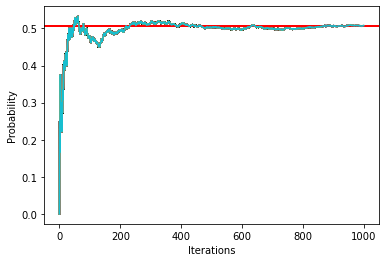

In [10]:
list1 = []  
country1 = getCountry()
country2 = getCountry()
elo1 = getElo(country1)
elo2 = getElo(country2)
answer = monte_carlo(1000)

